In [1]:
import pandas as pd
#loading Datasets
diabet = pd.read_csv('diabetic_data.csv')
data= pd.read_csv('diabetic_data3.csv')
diabet.head()

# Import visualization libraries
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# !pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import numpy as np

In [3]:
# Count the number of categorical (object type) columns in the dataset
len(diabet.select_dtypes('O').columns)

37

In [4]:
#checking for missing values
diabet.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [5]:
#checking shape of the dataset
diabet.shape

(101766, 50)

In [6]:
#Checking data types of each variable
diabet.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
#Identifying missing values in the dataset
#Missing values in the dataset are indicated by the '?' symbol
for column in diabet.columns:
    if diabet[column].dtype == object:
        print(column,diabet[column][diabet[column] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [8]:
# Using a custom count for gender
print('gender', diabet['gender'][diabet['gender']== 'Unknown/Invalid'].count())

gender 3


In [9]:
# weight, payer code and medical speciality have more than 80% of its data missing therefore they are being dropped.
#Citoglipton and examide have the sae vale in all rows so they will produce any useful patters so we dropped them.
diabet = diabet.drop(['weight','payer_code','medical_specialty', 'citoglipton', 'examide'], axis=1)

In [10]:
drop_rw = set(diabet[(diabet['diag_1'] == '?') & (diabet['diag_2'] == '?')&(diabet['diag_3'] == '?')].index)
drop_rw = drop_rw.union(set(diabet['diag_1'][diabet['diag_1'] == '?'].index))
drop_rw = drop_rw.union(set(diabet['diag_2'][diabet['diag_2'] == '?'].index))
drop_rw = drop_rw.union(set(diabet['diag_3'][diabet['diag_3'] == '?'].index))
drop_rw = drop_rw.union(set(diabet['race'][diabet['race'] == '?'].index))
drop_rw = drop_rw.union(set(diabet[diabet['discharge_disposition_id'] == '11'].index))
drop_rw = drop_rw.union(set(diabet['gender'][diabet['gender'] == 'Unknown/Invalid'].index))
new_rw = list(set(diabet.index) - set(drop_rw)) 
diabet = diabet.iloc[new_rw]


In [11]:
#Checking for missing values in the data
for column in diabet.columns:
    if diabet[column].dtype == object:
        print(column,diabet[column][diabet[column] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [12]:
print('gender', diabet['gender'][diabet['gender']== 'Unknown/Invalid'].count())

gender 0


In [13]:
# re-encoding admission type, discharge type and admission source into fewer categories

diabet['admission_type_id'] = diabet['admission_type_id'].replace(1,2)
diabet['admission_type_id'] = diabet['admission_type_id'].replace(7,2)
diabet['admission_type_id'] = diabet['admission_type_id'].replace(5,6)
diabet['admission_type_id'] = diabet['admission_type_id'].replace(8,6)

diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(6,1)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(8,1)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(13,1)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(14,1)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(5,2)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(10,2)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(16,2)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(22,2)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(23,2)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(24,2)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(27,2)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(28,2)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(29,2)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(30,2)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(4,3)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(5,3)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(9,3)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(12,3)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(15,3)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(17,3)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(19,11)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(20,11)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(21,11)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(25,18)
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].replace(26,18)


diabet['admission_source_id'] = diabet['admission_source_id'].replace(2,1)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(3,1)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(5,4)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(6,4)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(10,4)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(18,4)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(22,4)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(25,4)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(26,4)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(12,7)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(13,7)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(14,7)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(15,9)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(17,9)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(20,9)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(21,9)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(23,11)
diabet['admission_source_id'] = diabet['admission_source_id'].replace(24,11)


In [14]:
print (diabet[diabet.change == 'Ch'].shape[0])

45278


In [15]:
print (diabet.change.shape[0])

98052


In [16]:
print (diabet[diabet.change == 'No'].shape[0])

52774


In [17]:
print (52774+45278)

98052


In [18]:
print (diabet[diabet.glimepiride == 'No'].shape[0])

93065


In [19]:
meds = ['metformin', 'nateglinide', 'chlorpropamide','acetohexamide', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol','troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'repaglinide', 'glimepiride','tolbutamide' ]
for column in meds:
    columnname = str(column) + 'temp'
    diabet[columnname] = diabet[column].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
diabet['numchange'] = 0
for column in meds:
    columnname = str(column) + 'temp'
    diabet['numchange'] = diabet['numchange'] + diabet[columnname]
    del diabet[columnname]
    
diabet['numchange'].value_counts()  


0    71309
1    25350
2     1281
3      107
4        5
Name: numchange, dtype: int64

In [20]:
drop_rw = drop_rw.union(set(diabet[diabet['discharge_disposition_id'] == '11'].index))

In [21]:
diabet['change'] = diabet['change'].replace('Ch', 1)
diabet['change'] = diabet['change'].replace('No', 0)
diabet['gender'] = diabet['gender'].replace('Male', 1)
diabet['gender'] = diabet['gender'].replace('Female', 0)
diabet['diabetesMed'] = diabet['diabetesMed'].replace('Yes', 1)
diabet['diabetesMed'] = diabet['diabetesMed'].replace('No', 0)

for column in meds:
    diabet[column] = diabet[column].replace('No', 0)
    diabet[column] = diabet[column].replace('Steady', 1)
    diabet[column] = diabet[column].replace('Up', 1)
    diabet[column] = diabet[column].replace('Down', 1)

In [22]:
diabet['A1Cresult'] = diabet['A1Cresult'].replace('>7', 1)
diabet['A1Cresult'] = diabet['A1Cresult'].replace('>8', 1)
diabet['A1Cresult'] = diabet['A1Cresult'].replace('Norm', 0)
diabet['A1Cresult'] = diabet['A1Cresult'].replace('None', -99)
diabet['max_glu_serum'] = diabet['max_glu_serum'].replace('>200', 1)
diabet['max_glu_serum'] = diabet['max_glu_serum'].replace('>300', 1)
diabet['max_glu_serum'] = diabet['max_glu_serum'].replace('Norm', 0)
diabet['max_glu_serum'] = diabet['max_glu_serum'].replace('None', -99)

In [23]:
for i in range(0,10):
    diabet['age'] = diabet['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
diabet['age'].value_counts()

8     25305
7     21809
9     16702
6     16697
5      9265
4      3548
10     2717
3      1478
2       466
1        65
Name: age, dtype: int64

In [24]:
diabet2 = diabet.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
diabet2.shape

(68629, 46)

In [25]:
diabet.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,2,2,2,2,2
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


In [26]:
diabet['readmitted'].value_counts()

NO     52337
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [27]:
diabet['readmitted'] = diabet['readmitted'].replace('>30', 0)
diabet['readmitted'] = diabet['readmitted'].replace('<30', 1)
diabet['readmitted'] = diabet['readmitted'].replace('NO', 0)

In [28]:
diabet.shape

(98052, 46)

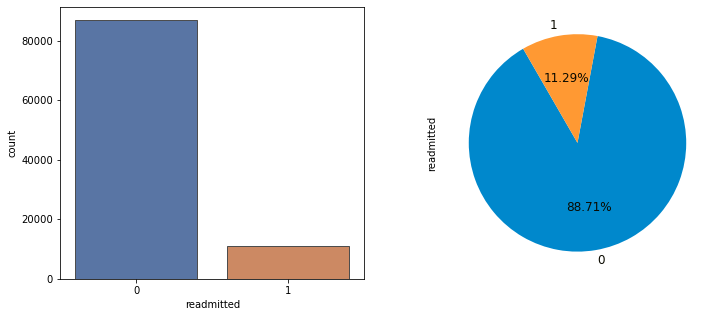

In [29]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=diabet.readmitted, data=diabet, palette="deep",ax=ax[0], edgecolor=".3")
diabet.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#0088cc','#ff9933'], 
                                        labels=labels, explode = (0,0), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In [30]:
diabet['level1_diag1'] = diabet['diag_1']
diabet['level2_diag1'] = diabet['diag_1']
diabet['level1_diag2'] = diabet['diag_2']
diabet['level2_diag2'] = diabet['diag_2']
diabet['level1_diag3'] = diabet['diag_3']
diabet['level2_diag3'] = diabet['diag_3']

In [31]:
diabet.loc[diabet['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
diabet.loc[diabet['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
diabet.loc[diabet['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
diabet.loc[diabet['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
diabet.loc[diabet['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
diabet.loc[diabet['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
diabet['level1_diag1'] = diabet['level1_diag1'].replace('?', -1)
diabet['level2_diag1'] = diabet['level2_diag1'].replace('?', -1)
diabet['level1_diag2'] = diabet['level1_diag2'].replace('?', -1)
diabet['level2_diag2'] = diabet['level2_diag2'].replace('?', -1)
diabet['level1_diag3'] = diabet['level1_diag3'].replace('?', -1)
diabet['level2_diag3'] = diabet['level2_diag3'].replace('?', -1)

In [32]:
diabet['level1_diag1'] = diabet['level1_diag1'].astype(float)
diabet['level2_diag1'] = diabet['level2_diag1'].astype(float)
diabet['level1_diag2'] = diabet['level1_diag2'].astype(float)
diabet['level2_diag2'] = diabet['level2_diag2'].astype(float)
diabet['level1_diag3'] = diabet['level1_diag3'].astype(float)
diabet['level2_diag3'] = diabet['level2_diag3'].astype(float)

In [33]:
for index, row in diabet.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        diabet.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        diabet.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        diabet.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        diabet.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        diabet.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        diabet.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        diabet.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        diabet.loc[index, 'level1_diag1'] = 8
    else:
        diabet.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        diabet.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        diabet.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        diabet.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        diabet.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        diabet.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        diabet.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        diabet.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        diabet.loc[index, 'level1_diag2'] = 8
    else:
        diabet.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        diabet.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        diabet.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        diabet.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        diabet.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        diabet.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        diabet.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        diabet.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        diabet.loc[index, 'level1_diag3'] = 8
    else:
        diabet.loc[index, 'level1_diag3'] = 0

In [34]:
for index, row in diabet.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        diabet.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        diabet.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        diabet.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        diabet.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        diabet.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        diabet.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        diabet.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        diabet.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        diabet.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        diabet.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        diabet.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        diabet.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        diabet.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        diabet.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        diabet.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        diabet.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        diabet.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        diabet.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        diabet.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        diabet.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        diabet.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        diabet.loc[index, 'level2_diag1'] = 22
    else:
        diabet.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        diabet.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        diabet.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        diabet.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        diabet.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        diabet.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        diabet.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        diabet.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        diabet.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        diabet.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        diabet.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        diabet.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        diabet.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        diabet.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        diabet.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        diabet.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        diabet.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        diabet.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        diabet.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        diabet.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        diabet.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        diabet.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        diabet.loc[index, 'level2_diag2'] = 22
    else:
        diabet.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        diabet.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        diabet.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        diabet.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        diabet.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        diabet.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        diabet.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        diabet.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        diabet.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        diabet.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        diabet.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        diabet.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        diabet.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        diabet.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        diabet.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        diabet.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        diabet.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        diabet.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        diabet.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        diabet.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        diabet.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        diabet.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        diabet.loc[index, 'level2_diag3'] = 22
    else:
        diabet.loc[index, 'level2_diag3'] = 0


Text(0.5, 1.0, 'Time in hospital VS. Readmission frequency')

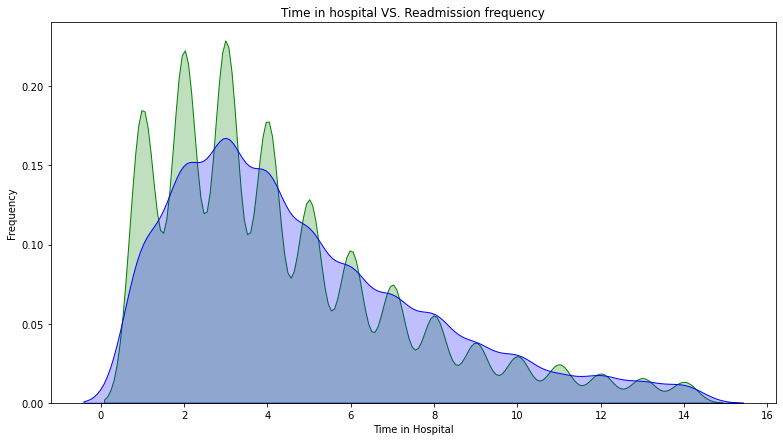

In [35]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(diabet.loc[(diabet['readmitted'] == 0),'time_in_hospital'] , color='g',shade=True,label='Not Readmitted')
ax=sns.kdeplot(diabet.loc[(diabet['readmitted'] == 1),'time_in_hospital'] , color='b',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in hospital VS. Readmission frequency')

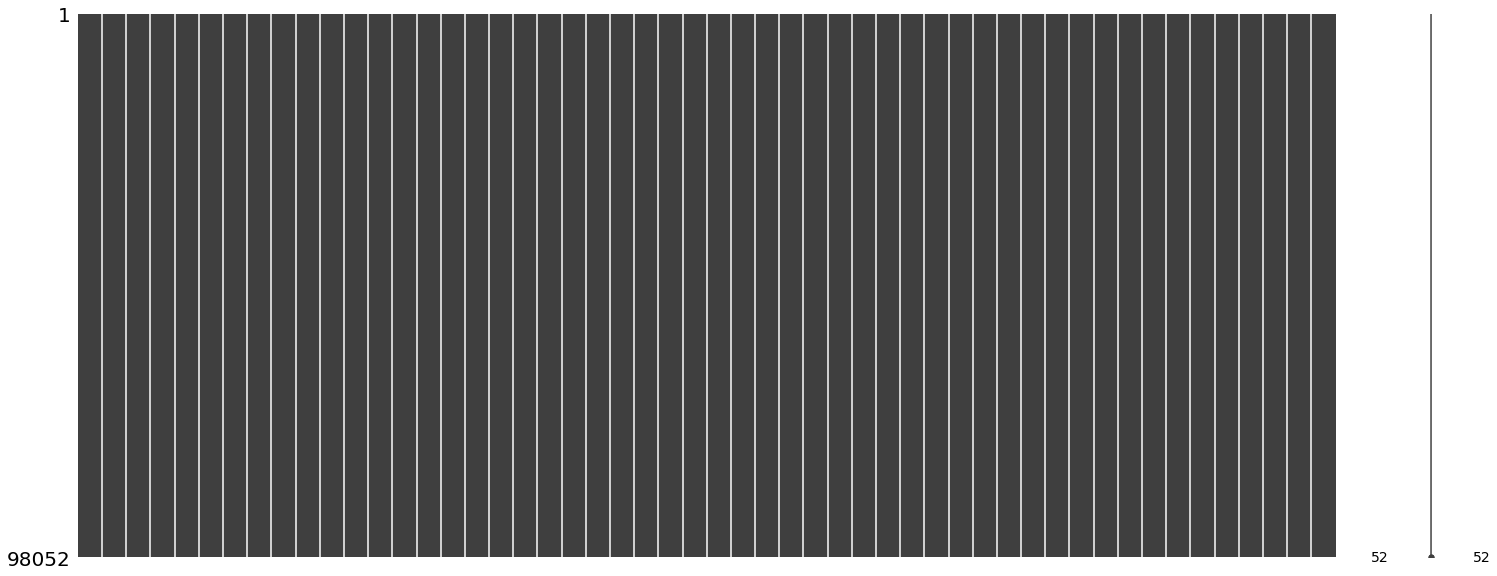

In [36]:
msno.matrix(diabet)
plt.show()

In [37]:
def boxplot_for_outlier(diabet,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = diabet[columns[count]], palette="Wistia",ax=ax[i][j])  # palette = rocket, Wistia
            count = count+1

In [38]:
def display_all(data):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(data)
display_all(data.head())

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [39]:
data.readmitted = [1 if each=='<30' else 0 for each in data.readmitted]

In [40]:
data.replace('?', np.nan , inplace=True)

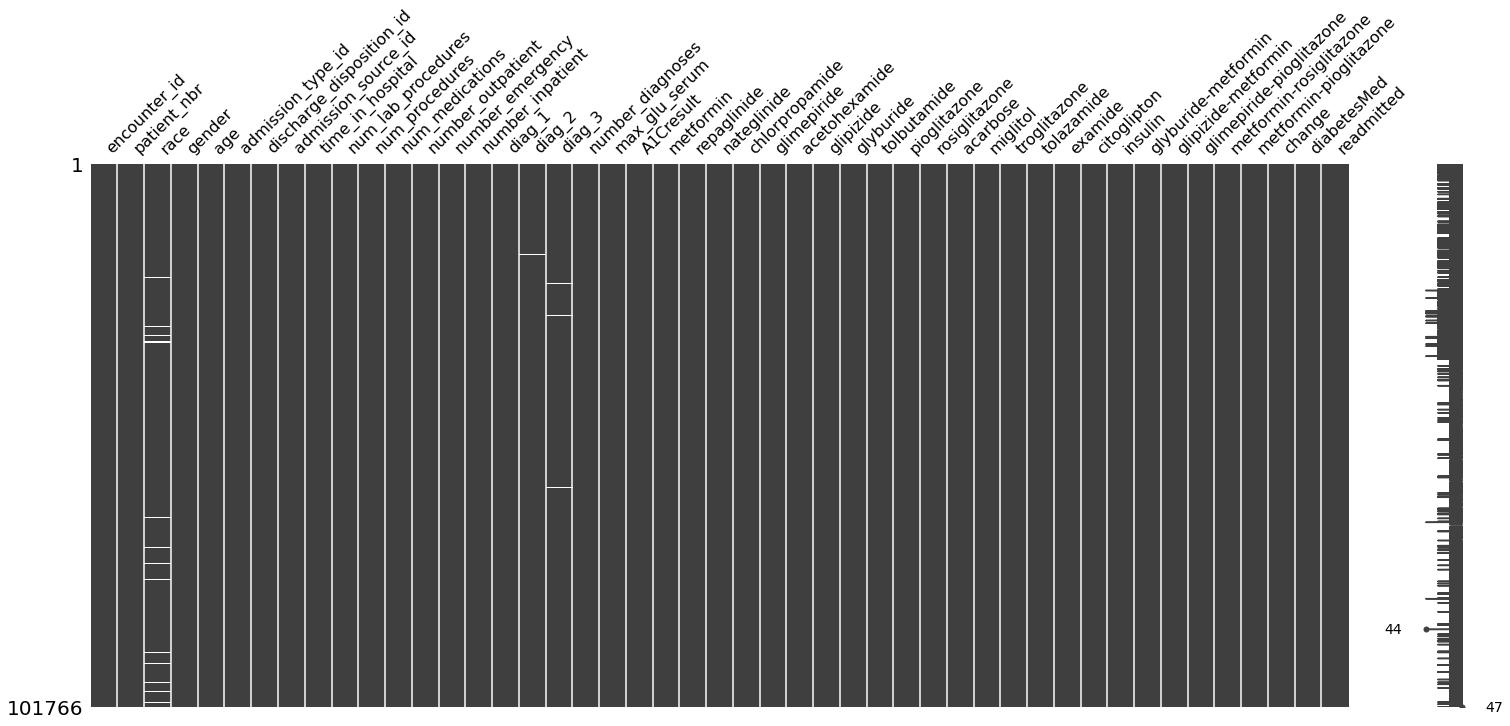

In [41]:
msno.matrix(data)
plt.show()

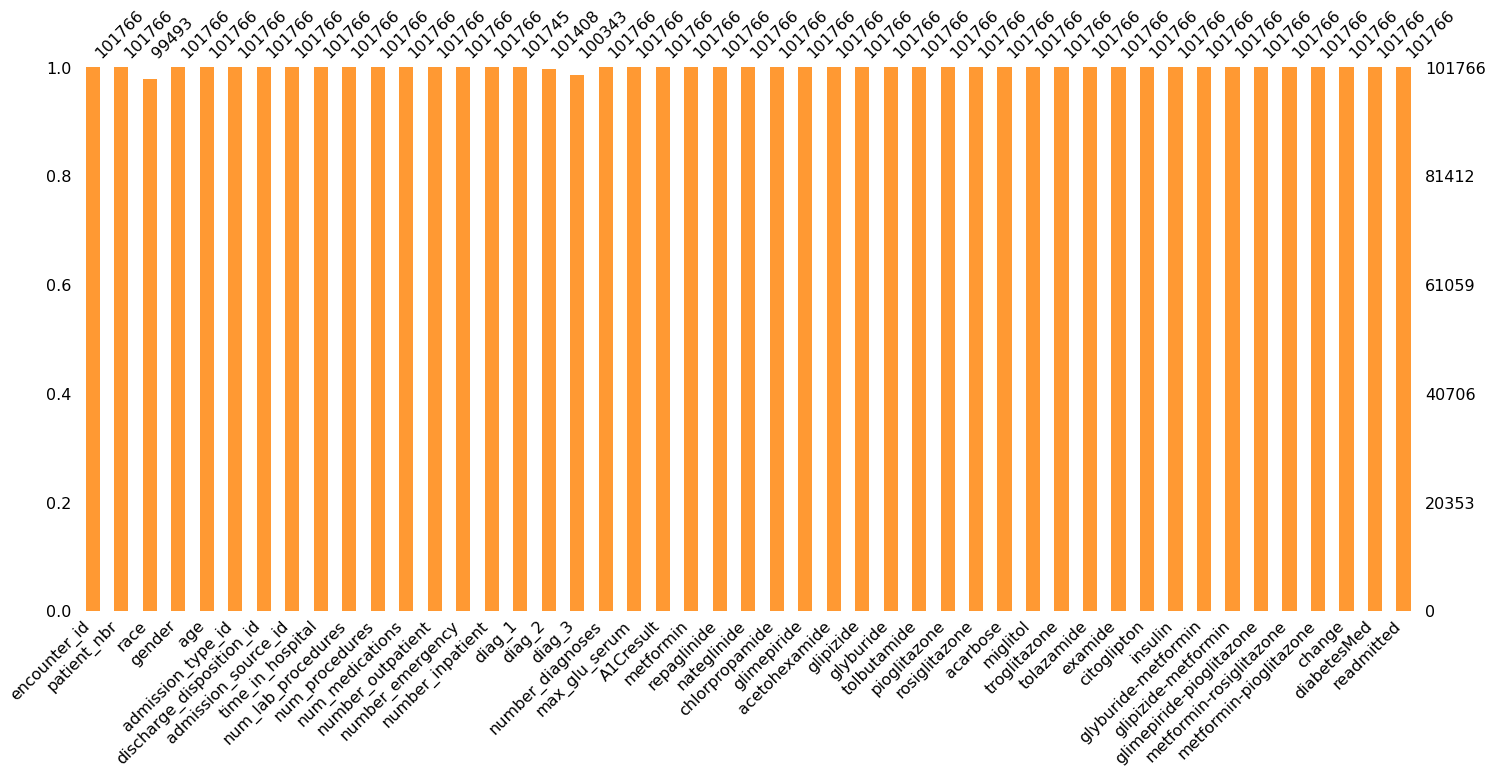

In [42]:
msno.bar(data,sort='descending',color='#ff9933')
plt.show()

In [43]:

def Missing_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [44]:
data_info = Missing_Values(data)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
race,101766,2273,0.0223,object,"[Caucasian, AfricanAmerican, nan, Other, Asian...",6
diag_3,101766,1423,0.0140,object,"[nan, 255, V27, 403, 250, V45, 38, 486, 996, 1...",790
diag_2,101766,358,0.0035,object,"[nan, 250.01, 250, 250.43, 157, 411, 492, 427,...",749
diag_1,101766,21,0.0002,object,"[250.83, 276, 648, 8, 197, 414, 428, 398, 434,...",717
encounter_id,101766,0,0.0000,int64,"[2278392, 149190, 64410, 500364, 16680, 35754,...",101766
tolazamide,101766,0,0.0000,object,"[No, Steady, Up]",3
glyburide,101766,0,0.0000,object,"[No, Steady, Up, Down]",4
tolbutamide,101766,0,0.0000,object,"[No, Steady]",2
pioglitazone,101766,0,0.0000,object,"[No, Steady, Up, Down]",4


In [45]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]], palette="flare",ax=ax[i][j])  # palette = rocket, Wistia
            count = count+1

In [46]:
data_dictionary = pd.read_csv('var.csv', sep=';')
data_dictionary = data_dictionary.set_index("variable_name")
data_dictionary.head()


,Variable_Structure
variable_name,
race,nominal
diag_3,nominal
diag_2,nominal
diag_1,nominal
encounter_id,numeric


In [47]:
data_info = Missing_Values(data)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
race,101766,2273,0.0223,object,"[Caucasian, AfricanAmerican, nan, Other, Asian...",6
diag_3,101766,1423,0.0140,object,"[nan, 255, V27, 403, 250, V45, 38, 486, 996, 1...",790
diag_2,101766,358,0.0035,object,"[nan, 250.01, 250, 250.43, 157, 411, 492, 427,...",749
diag_1,101766,21,0.0002,object,"[250.83, 276, 648, 8, 197, 414, 428, 398, 434,...",717
encounter_id,101766,0,0.0000,int64,"[2278392, 149190, 64410, 500364, 16680, 35754,...",101766
tolazamide,101766,0,0.0000,object,"[No, Steady, Up]",3
glyburide,101766,0,0.0000,object,"[No, Steady, Up, Down]",4
tolbutamide,101766,0,0.0000,object,"[No, Steady]",2
pioglitazone,101766,0,0.0000,object,"[No, Steady, Up, Down]",4


In [48]:
data_info['Variable_Structure'] = np.array(data_dictionary["Variable_Structure"])
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value,Variable_Structure
Variable,,,,,,,
race,101766,2273,0.0223,object,"[Caucasian, AfricanAmerican, nan, Other, Asian...",6,nominal
diag_3,101766,1423,0.0140,object,"[nan, 255, V27, 403, 250, V45, 38, 486, 996, 1...",790,nominal
diag_2,101766,358,0.0035,object,"[nan, 250.01, 250, 250.43, 157, 411, 492, 427,...",749,nominal
diag_1,101766,21,0.0002,object,"[250.83, 276, 648, 8, 197, 414, 428, 398, 434,...",717,nominal
encounter_id,101766,0,0.0000,int64,"[2278392, 149190, 64410, 500364, 16680, 35754,...",101766,numeric
tolazamide,101766,0,0.0000,object,"[No, Steady, Up]",3,nominal
glyburide,101766,0,0.0000,object,"[No, Steady, Up, Down]",4,nominal
tolbutamide,101766,0,0.0000,object,"[No, Steady]",2,nominal
pioglitazone,101766,0,0.0000,object,"[No, Steady, Up, Down]",4,nominal


In [49]:
numerical_columns = list(data_info.loc[(data_info.loc[:,"Variable_Structure"]=="numeric")].index)
len(numerical_columns), numerical_columns

(10,
 ['encounter_id',
  'num_medications',
  'time_in_hospital',
  'num_lab_procedures',
  'num_procedures',
  'number_outpatient',
  'number_emergency',
  'number_inpatient',
  'number_diagnoses',
  'repaglinide'])

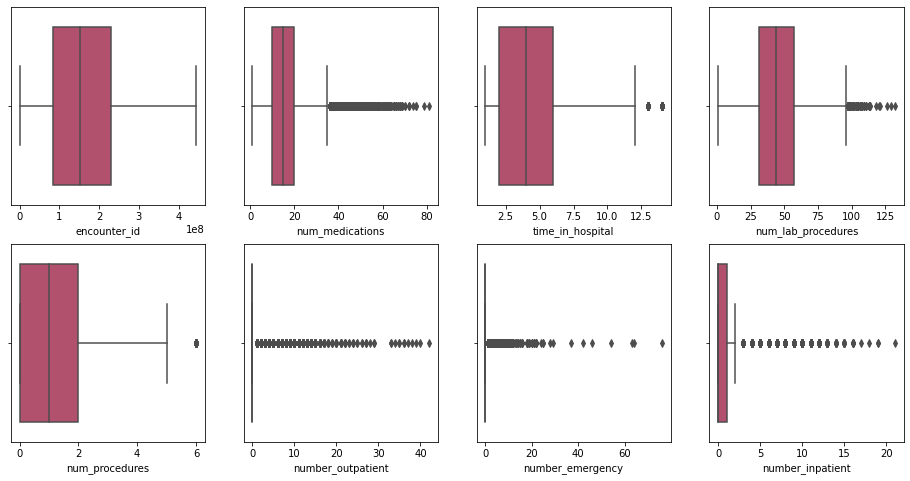

In [50]:
boxplot_for_outlier(data,numerical_columns)

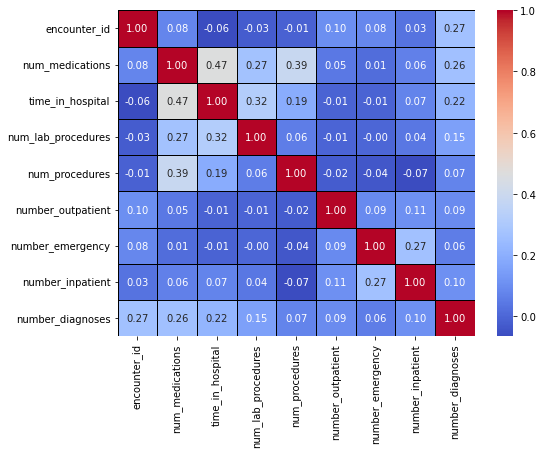

In [51]:
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

In [52]:
data.gender.replace('Unknown/Invalid', np.nan , inplace=True)
data.dropna(subset=['gender'], how='all', inplace = True)

In [53]:
data.gender.value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

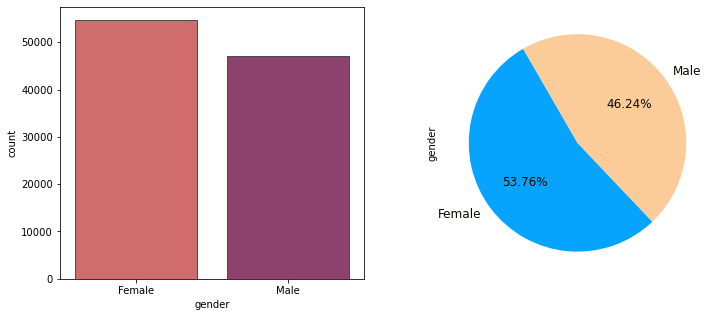

In [54]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['Female','Male']
sns.countplot(x=data.gender, data=data, palette="flare",ax=ax[0], edgecolor=".3")
data.gender.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#06a3ff','#fbcc99'], 
                                        labels=labels, explode = (0, 0), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

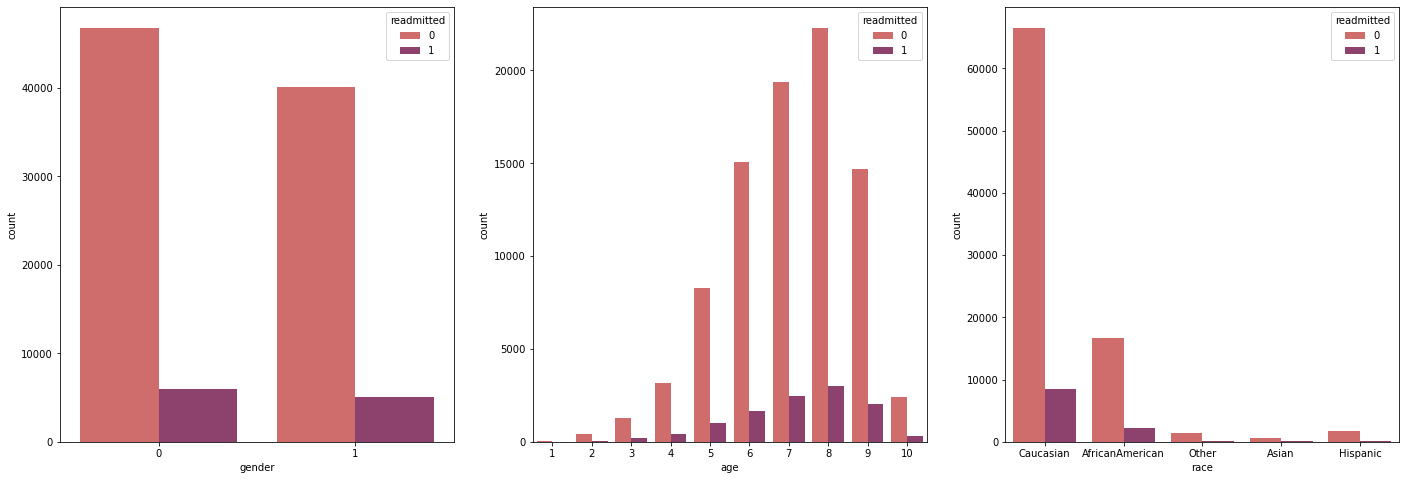

In [55]:
visual_list = ['gender','age','race']
fig, ax =plt.subplots(nrows=1,ncols=3,figsize=(24,8))
count =0
for i in visual_list:
    sns.countplot(diabet[i], hue=diabet.readmitted, palette='flare', ax=ax[count]);
    count = count+1

In [56]:
diabet.groupby(by = "insulin").readmitted.mean()

insulin
0    0.101389
1    0.122971
Name: readmitted, dtype: float64

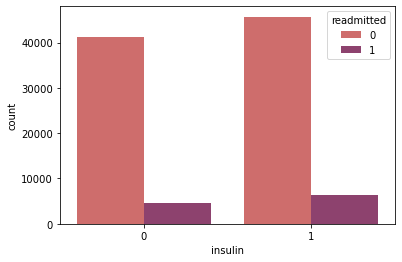

In [57]:
sns.countplot(x="insulin", hue="readmitted", data=diabet, palette="flare")
plt.show()

Text(0.5, 1.0, 'Number of medications VS. Readmission rate')

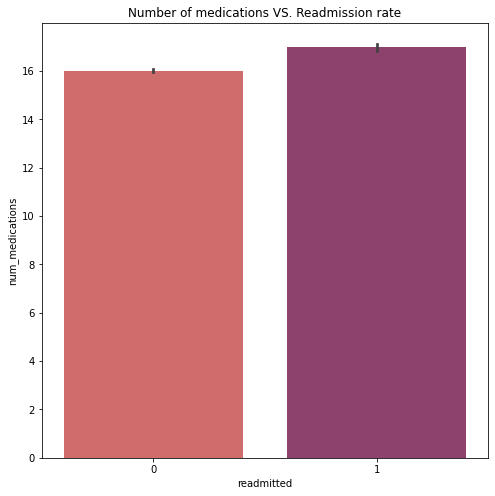

In [58]:
fig = plt.figure(figsize=(8,8))
sns.barplot(palette='flare',x = diabet['readmitted'], y = diabet['num_medications']).set_title("Number of medications VS. Readmission rate")

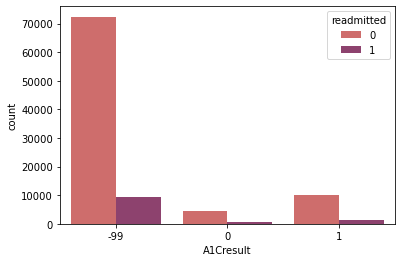

In [59]:
sns.countplot(x="A1Cresult", hue="readmitted", data=diabet, palette="flare")
plt.show()

Text(0.5, 1.0, 'Lab procedures VS. Readmission rate')

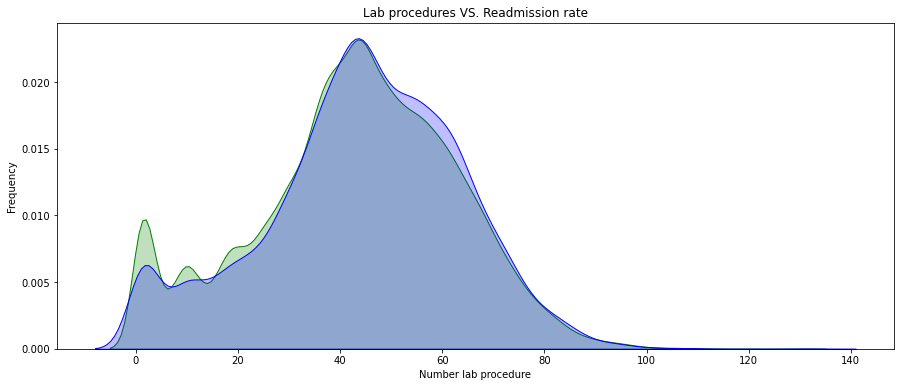

In [60]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(diabet.loc[(diabet['readmitted'] == 0),'num_lab_procedures'] , color='g',shade=True, label='Not readmitted')
ax=sns.kdeplot(diabet.loc[(diabet['readmitted'] == 1),'num_lab_procedures'] , color='b',shade=True, label='readmitted')
ax.set(xlabel='Number lab procedure', ylabel='Frequency')
plt.title('Lab procedures VS. Readmission rate')

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

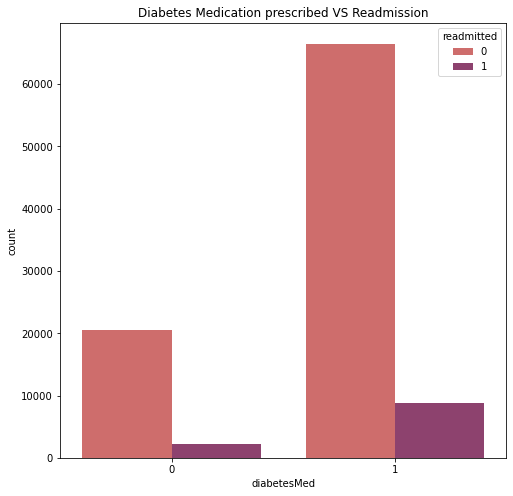

In [61]:
fig = plt.figure(figsize=(8,8))
sns.countplot(diabet['diabetesMed'], palette='flare', hue = diabet['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

In [62]:
for i in range(0,10):
    diabet['age'] = diabet['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
diabet['age'].value_counts()


8     25305
7     21809
9     16702
6     16697
5      9265
4      3548
10     2717
3      1478
2       466
1        65
Name: age, dtype: int64

In [63]:
diabet['age'] = diabet['age'].astype('int64')
print(diabet.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
diabet['age'] = diabet.age.map(age_dict)
print(diabet.age.value_counts())

8     25305
7     21809
9     16702
6     16697
5      9265
4      3548
10     2717
3      1478
2       466
1        65
Name: age, dtype: int64
75    25305
65    21809
85    16702
55    16697
45     9265
35     3548
95     2717
25     1478
15      466
5        65
Name: age, dtype: int64


In [64]:
diabet['service_utilization'] = diabet['number_outpatient'] + diabet['number_emergency'] + diabet['number_inpatient']

In [65]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    diabet[colname] = diabet[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
diabet['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    diabet['numchange'] = diabet['numchange'] + diabet[colname]
    del diabet[colname]
    
diabet['numchange'].value_counts()  

21    98052
Name: numchange, dtype: int64

In [66]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diabetesMed,readmitted,numchange,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3,service_utilization
1,149190,55629189,Caucasian,0,15,2,1,7,3,59,...,1,0,21,0.0,20.0,4.0,14.0,0.0,20.0,0
2,64410,86047875,AfricanAmerican,0,25,2,1,7,2,11,...,1,0,21,0.0,0.0,4.0,14.0,0.0,0.0,3
3,500364,82442376,Caucasian,1,35,2,1,7,2,44,...,1,0,21,0.0,0.0,4.0,14.0,1.0,2.0,0
4,16680,42519267,Caucasian,1,45,2,1,7,1,51,...,1,0,21,8.0,19.0,8.0,19.0,4.0,14.0,0
5,35754,82637451,Caucasian,1,55,2,1,1,3,31,...,1,0,21,1.0,2.0,1.0,2.0,4.0,14.0,0


In [67]:
i = ['encounter_id', 'patient_nbr','race', 'gender', 'age','admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'time_in_hospital', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
        'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

diabet[i] = diabet[i].astype('object')

In [68]:
diabet.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital            object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [69]:
diabet['nummed'] = 0

for col in keys:
    diabet['nummed'] = diabet['nummed'] + diabet[col]
diabet['nummed'].value_counts()

1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: nummed, dtype: int64

In [70]:
num_col = list(set(list(diabet._get_numeric_data().columns))- {'readmitted'})
num_col

['service_utilization',
 'num_medications',
 'numchange',
 'number_inpatient',
 'number_emergency',
 'number_outpatient',
 'num_procedures',
 'number_diagnoses',
 'num_lab_procedures']

In [71]:
statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = diabet[i].skew()
    skew_before.append(skewval)
    
    kurtval = diabet[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = diabet[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(diabet[diabet[i] == 0])/len(diabet) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(diabet[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(diabet[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(diabet[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(diabet[diabet[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(diabet[diabet[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(diabet[diabet[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after


In [72]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,service_utilization,5.292799,66.596355,2.314742,Yes,log1p,1.092746,0.486317,0.665792
1,num_medications,1.332717,3.493545,8.108496,No,NA,1.332717,3.493545,8.108496
2,numchange,0.000000,0.000000,0.000000,No,NA,0.000000,0.000000,0.000000
3,number_inpatient,3.554811,19.943138,1.271025,Yes,log1p,1.416796,1.290196,0.514047
4,number_emergency,22.710234,1171.626491,0.942897,Yes,log1p,3.607106,15.781574,0.318286
5,number_outpatient,8.781663,145.589922,1.283365,Yes,log1p,2.714801,7.697978,0.432881
6,num_procedures,1.303967,0.823874,1.708475,No,NA,1.303967,0.823874,1.708475
7,number_diagnoses,-0.817531,-0.345022,1.832472,No,NA,-0.817531,-0.345022,1.832472
8,num_lab_procedures,-0.235532,-0.245140,19.711757,No,NA,-0.235532,-0.245140,19.711757


In [73]:
for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            diabet = diabet[diabet[colname] > 0]
            diabet[colname + "_log"] = np.log(diabet[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            diabet = diabet[diabet[colname] >= 0]
            diabet[colname + "_log1p"] = np.log1p(diabet[colname])

In [74]:
diabet = diabet.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [75]:
diabet.shape

(98052, 54)

In [76]:
numerics = list(set(list(diabet._get_numeric_data().columns))- {'readmitted'})
numerics

['num_medications',
 'numchange',
 'number_outpatient_log1p',
 'service_utilization_log1p',
 'number_emergency_log1p',
 'num_procedures',
 'number_diagnoses',
 'number_inpatient_log1p',
 'num_lab_procedures']

In [77]:
diabet.encounter_id = diabet.encounter_id.astype('int64')
diabet.patient_nbr = diabet.patient_nbr.astype('int64')
diabet.diabetesMed = diabet.diabetesMed.astype('int64')
diabet.change = diabet.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
diabet[i] = diabet[i].astype('int64')

diabet.dtypes


encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital              object
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
p

In [78]:
dfcopy = diabet.copy(deep = True)

In [79]:
diabet['readmitted'] = diabet['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [80]:
diabet.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [81]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [82]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    diabet[name] = diabet[inter[0]] * diabet[inter[1]]

In [83]:
diabet[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8
5,16,3,48


In [84]:
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: diabet[x].std())
datf['mean'] = datf['features'].apply(lambda x: diabet[x].mean())

In [85]:
df2 = diabet.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(68629, 55)

In [86]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))


In [87]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [88]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,service_utilization_log1p,number_inpatient_log1p,number_emergency_log1p,number_outpatient_log1p,num_medications|num_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,change|num_medications,num_medications|numchange
num_lab_procedures,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
num_procedures,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
num_medications,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
number_diagnoses,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
A1Cresult,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
metformin,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
repaglinide,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nateglinide,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
chlorpropamide,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
glimepiride,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [89]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,service_utilization_log1p,number_inpatient_log1p,number_emergency_log1p,number_outpatient_log1p,num_medications|num_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,change|num_medications,num_medications|numchange
num_lab_procedures,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
num_procedures,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
num_medications,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
number_diagnoses,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
A1Cresult,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
metformin,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
repaglinide,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nateglinide,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
chlorpropamide,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
glimepiride,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [90]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)      
df_pd.drop(['race'], inplace=True, axis=1)

In [91]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [92]:
num_cols = list(set(list(diabet._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['insulin',
 'acetohexamide',
 'number_outpatient_log1p',
 'service_utilization_log1p',
 'metformin-pioglitazone',
 'repaglinide',
 'tolbutamide',
 'patient_nbr',
 'metformin',
 'num_medications|numchange',
 'troglitazone',
 'num_medications',
 'num_medications|num_procedures',
 'glipizide',
 'glimepiride',
 'number_diagnoses',
 'num_medications|num_lab_procedures',
 'metformin-rosiglitazone',
 'diabetesMed',
 'num_lab_procedures',
 'nateglinide',
 'pioglitazone',
 'rosiglitazone',
 'glyburide-metformin',
 'glipizide-metformin',
 'encounter_id',
 'A1Cresult',
 'chlorpropamide',
 'numchange',
 'miglitol',
 'num_medications|number_diagnoses',
 'tolazamide',
 'change|num_medications',
 'number_emergency_log1p',
 'glimepiride-pioglitazone',
 'num_procedures',
 'acarbose',
 'number_inpatient_log1p',
 'glyburide']

In [93]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [94]:
new_non_num_cols

[]

In [95]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [96]:
df_pd.head().T

""
encounter_id
patient_nbr
age
time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_diagnoses
metformin
repaglinide


In [97]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                 'level1_diag1_5.0','level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']

In [98]:
X = df_pd[feature_set]
y = df_pd['readmitted']

KeyError: "['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1', 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4', 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0', 'level1_diag1_5.0', 'level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0'] not in index"

In [99]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 
                 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 
                 'admission_source_id_9', 'max_glu_serum_0', 
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [100]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']
df_pd['readmitted'].value_counts()

KeyError: "['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1', 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4', 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0', 'level1_diag1_5.0', 'level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0'] not in index"

In [101]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101763.0,1.652008e+08,1.026410e+08,12522.0,84959748.0,152388294.0,230269803.0,443867222.0
patient_nbr,101763.0,5.432965e+07,3.869658e+07,135.0,23412964.5,45500490.0,87545713.5,189502619.0
admission_type_id,101763.0,2.024017e+00,1.445414e+00,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101763.0,3.715515e+00,5.279919e+00,1.0,1.0,1.0,4.0,28.0
admission_source_id,101763.0,5.754459e+00,4.064110e+00,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101763.0,4.396018e+00,2.985092e+00,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101763.0,4.309591e+01,1.967422e+01,1.0,31.0,44.0,57.0,132.0
num_procedures,101763.0,1.339691e+00,1.705792e+00,0.0,0.0,1.0,2.0,6.0
num_medications,101763.0,1.602184e+01,8.127589e+00,1.0,10.0,15.0,20.0,81.0
number_outpatient,101763.0,3.693680e-01,1.267282e+00,0.0,0.0,0.0,0.0,42.0


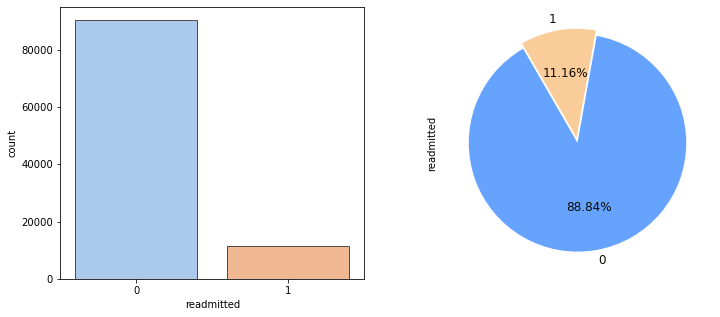

In [102]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=data.readmitted, data=data, palette="pastel",ax=ax[0], edgecolor=".3")
data.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In [103]:
data.replace('?', np.nan , inplace=True)

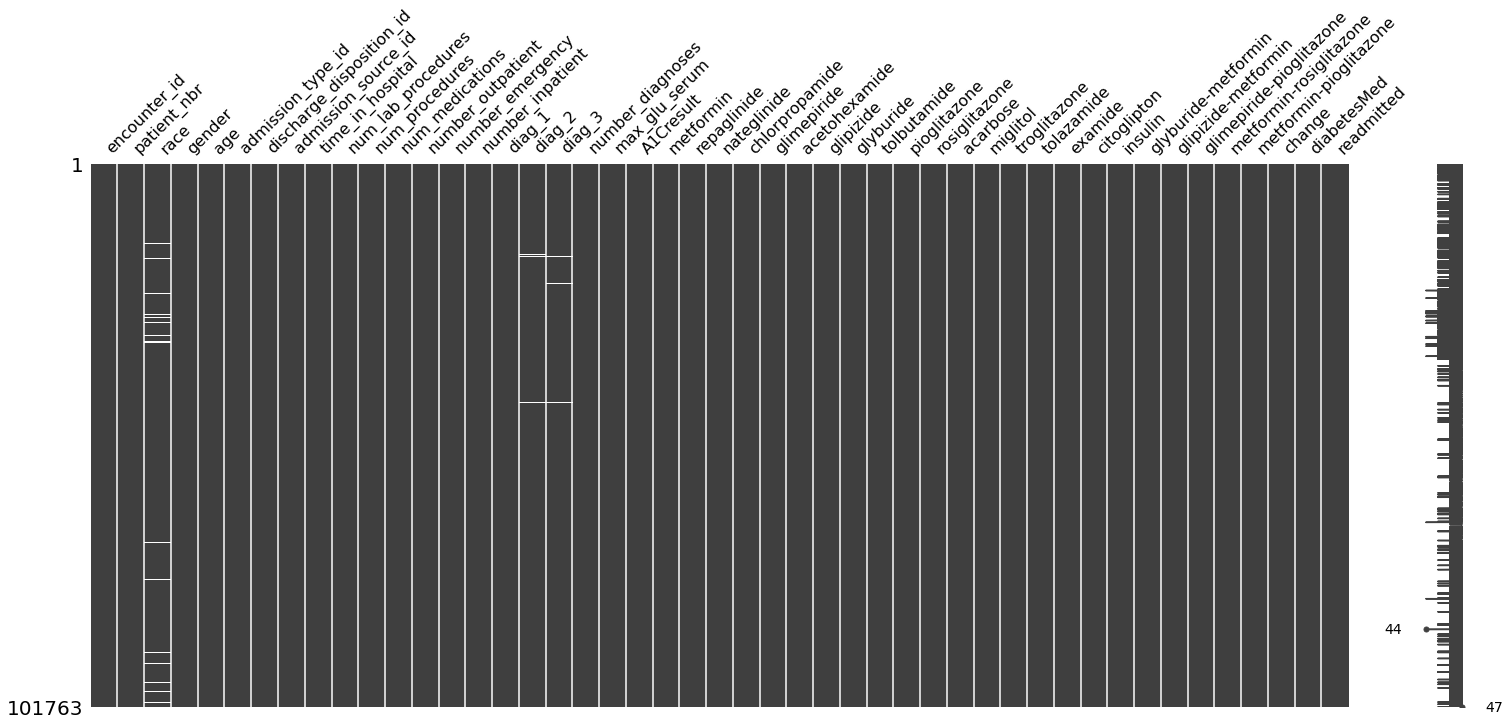

In [104]:
msno.matrix(data)
plt.show()

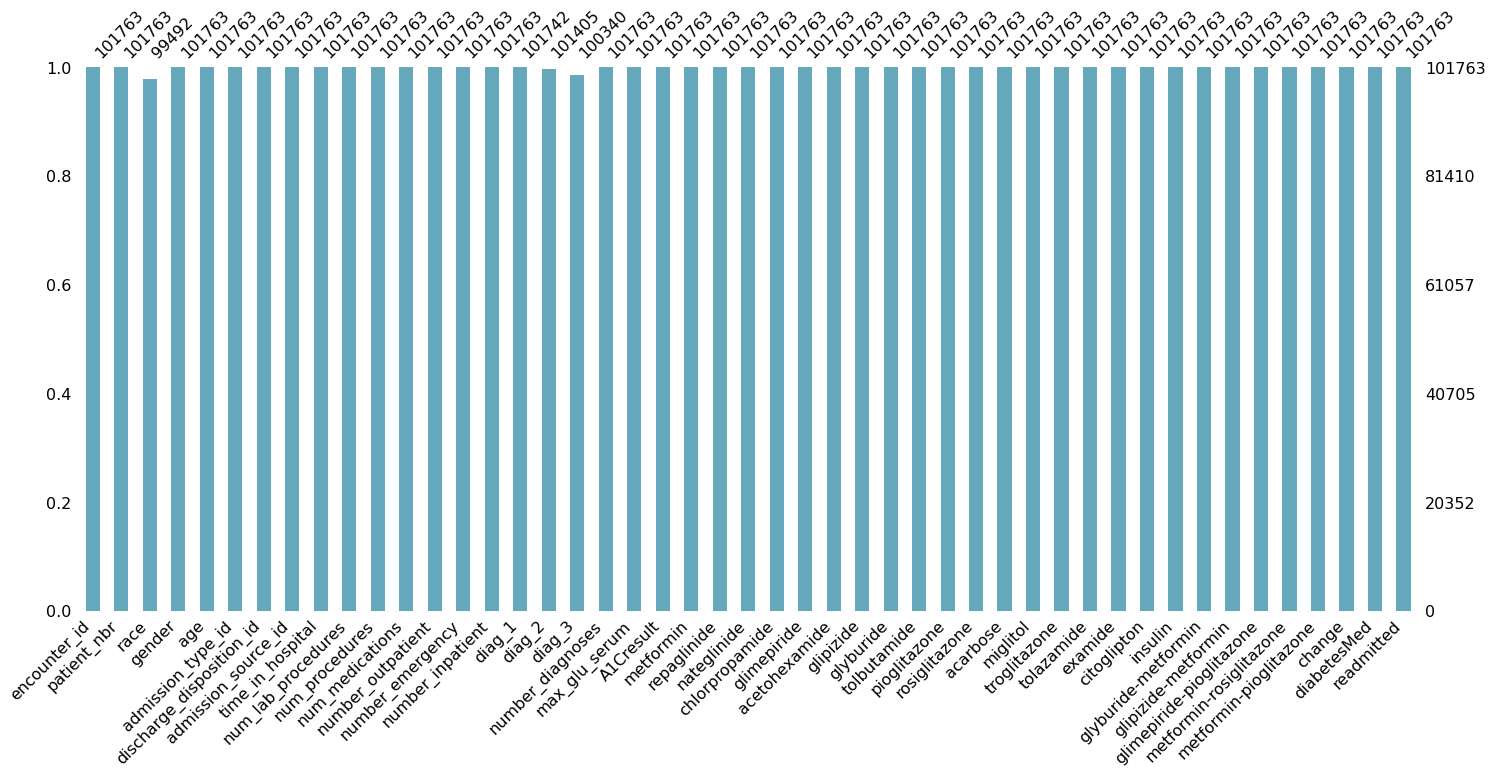

In [106]:
msno.bar(data,sort='descending',color='#66a9bc')
plt.show()

In [107]:
def Missing_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [108]:
data_info = Missing_Values(data)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
race,101763,2271,0.0223,object,"[Caucasian, AfricanAmerican, nan, Other, Asian...",6
diag_3,101763,1423,0.0140,object,"[nan, 255, V27, 403, 250, V45, 38, 486, 996, 1...",790
diag_2,101763,358,0.0035,object,"[nan, 250.01, 250, 250.43, 157, 411, 492, 427,...",749
diag_1,101763,21,0.0002,object,"[250.83, 276, 648, 8, 197, 414, 428, 398, 434,...",717
encounter_id,101763,0,0.0000,int64,"[2278392, 149190, 64410, 500364, 16680, 35754,...",101763
tolazamide,101763,0,0.0000,object,"[No, Steady, Up]",3
glyburide,101763,0,0.0000,object,"[No, Steady, Up, Down]",4
tolbutamide,101763,0,0.0000,object,"[No, Steady]",2
pioglitazone,101763,0,0.0000,object,"[No, Steady, Up, Down]",4


In [109]:
data_info['Variable_Structure'] = np.array(data_dictionary["Variable_Structure"])
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value,Variable_Structure
Variable,,,,,,,
race,101763,2271,0.0223,object,"[Caucasian, AfricanAmerican, nan, Other, Asian...",6,nominal
diag_3,101763,1423,0.0140,object,"[nan, 255, V27, 403, 250, V45, 38, 486, 996, 1...",790,nominal
diag_2,101763,358,0.0035,object,"[nan, 250.01, 250, 250.43, 157, 411, 492, 427,...",749,nominal
diag_1,101763,21,0.0002,object,"[250.83, 276, 648, 8, 197, 414, 428, 398, 434,...",717,nominal
encounter_id,101763,0,0.0000,int64,"[2278392, 149190, 64410, 500364, 16680, 35754,...",101763,numeric
tolazamide,101763,0,0.0000,object,"[No, Steady, Up]",3,nominal
glyburide,101763,0,0.0000,object,"[No, Steady, Up, Down]",4,nominal
tolbutamide,101763,0,0.0000,object,"[No, Steady]",2,nominal
pioglitazone,101763,0,0.0000,object,"[No, Steady, Up, Down]",4,nominal


In [110]:
drop_list = ['examide' , 'citoglipton', 'weight','encounter_id','patient_nbr','payer_code','medical_specialty']  
data.drop(drop_list,axis=1, inplace=True)
data_info.drop(drop_list, axis=0,inplace=True)

KeyError: "['weight' 'payer_code' 'medical_specialty'] not found in axis"

In [111]:
numerical_columns = list(data_info.loc[(data_info.loc[:,"Variable_Structure"]=="numeric")].index)
len(numerical_columns), numerical_columns

(10,
 ['encounter_id',
  'num_medications',
  'time_in_hospital',
  'num_lab_procedures',
  'num_procedures',
  'number_outpatient',
  'number_emergency',
  'number_inpatient',
  'number_diagnoses',
  'repaglinide'])

In [112]:
categorical_columns = list(data_info.loc[(data_info.loc[:,"Variable_Structure"]=="nominal")].index)
len(categorical_columns), categorical_columns

(37,
 ['race',
  'diag_3',
  'diag_2',
  'diag_1',
  'tolazamide',
  'glyburide',
  'tolbutamide',
  'pioglitazone',
  'rosiglitazone',
  'acarbose',
  'miglitol',
  'troglitazone',
  'examide',
  'acetohexamide',
  'citoglipton',
  'insulin',
  'glyburide-metformin',
  'glipizide-metformin',
  'glimepiride-pioglitazone',
  'metformin-rosiglitazone',
  'metformin-pioglitazone',
  'change',
  'diabetesMed',
  'glipizide',
  'nateglinide',
  'glimepiride',
  'gender',
  'age',
  'admission_type_id',
  'discharge_disposition_id',
  'admission_source_id',
  'chlorpropamide',
  'max_glu_serum',
  'A1Cresult',
  'metformin',
  'patient_nbr',
  'readmitted'])

In [113]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]], palette="Wistia",ax=ax[i][j])  # palette = rocket, Wistia
            count = count+1

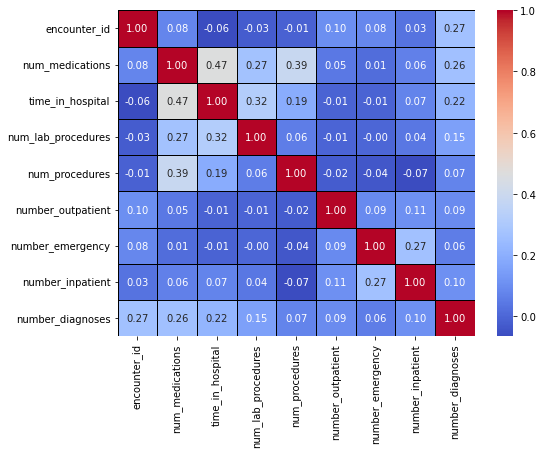

In [114]:
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

In [115]:
data.gender.replace('Unknown/Invalid', np.nan , inplace=True)
data.dropna(subset=['gender'], how='all', inplace = True)

In [116]:
data.gender.value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

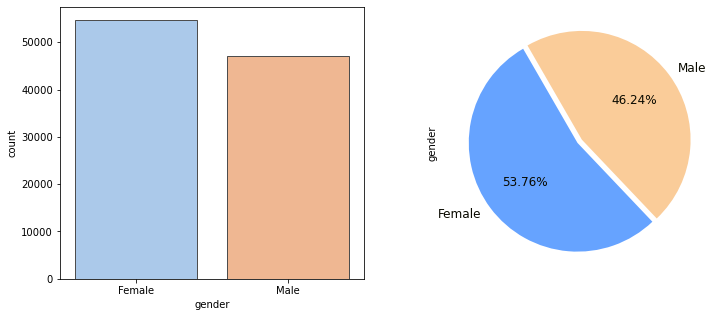

In [117]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['Female','Male']
sns.countplot(x=data.gender, data=data, palette="pastel",ax=ax[0], edgecolor=".3")
data.gender.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In [118]:
data.groupby(by = "insulin").readmitted.mean()

insulin
Down      0.138975
No        0.100380
Steady    0.111284
Up        0.129905
Name: readmitted, dtype: float64

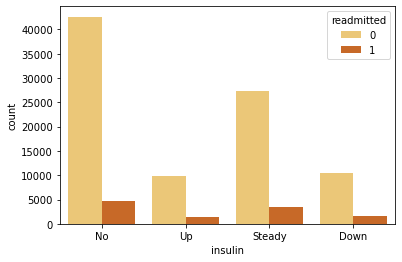

In [119]:
sns.countplot(x="insulin", hue="readmitted", data=data, palette="YlOrBr")
plt.show()

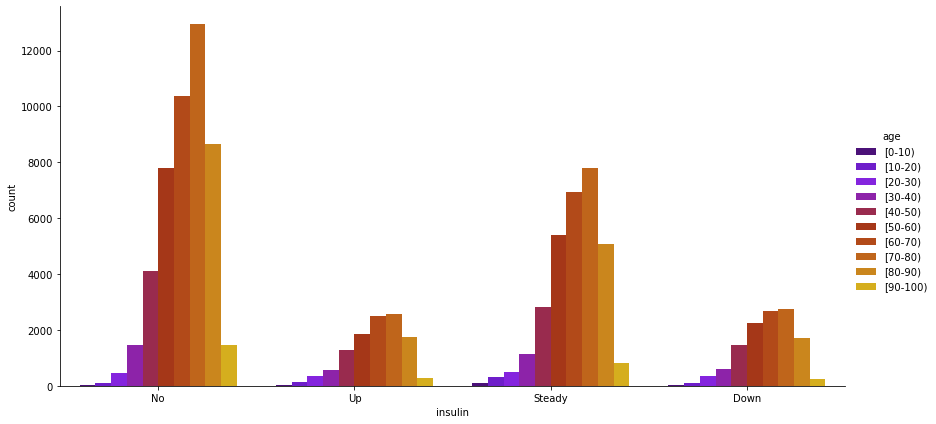

In [120]:
age_list = list(data.age.unique())
sns.catplot(x="insulin", hue="age", data=data, kind="count", height=6, aspect=2, palette="gnuplot");

In [121]:
data["race"].fillna(data["race"].mode()[0], inplace = True)

In [122]:
data["race"].isnull().sum()

0

In [123]:
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [125]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [126]:
diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    data[col].fillna('NaN', inplace=True)

In [127]:
import re
import numpy as np
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

def diag_transform(value):
    if value==250:
        category = 1
    else :
        category = 0
        
    return category

In [128]:
for col in diag_list:
    data[col] = data[col].apply(transformFunc)
    data[col] = data[col].astype(float)

In [129]:
for col in diag_list:
    data[col] = data[col].apply(transformCategory)

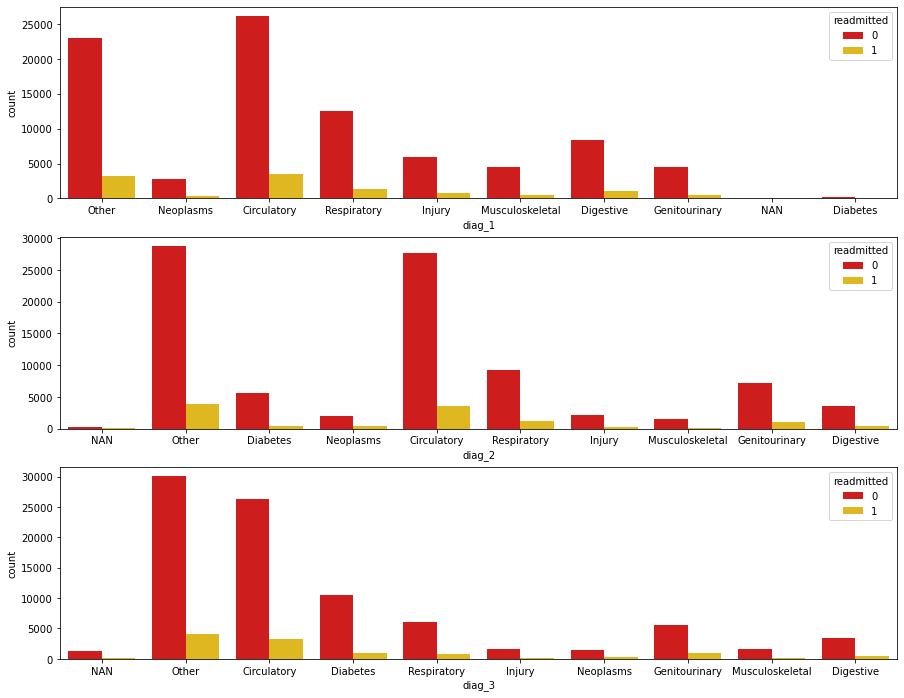

In [130]:
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(15,12))
count =0
for i in diag_list:
    sns.countplot(data[i], hue=data.readmitted, palette='hot', ax=ax[count]);
    count = count+1

In [136]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 2 , contamination = 0.1)
clf.fit_predict(data[numerical_columns])

ValueError: could not convert string to float: 'No'

In [135]:
df_scores = clf.negative_outlier_factor_
df_scores[0:30]

AttributeError: 'LocalOutlierFactor' object has no attribute 'negative_outlier_factor_'